#### Function to Calculate Mean

In [1]:
# Calculate the mean value of a list of numbers
# mean(x) = sum(x) / count(x)
def mean(values):
    return sum(values) / float(len(values))

#### Function to Calculate Variance

In [2]:
# Calculate the variance of a list of numbers
# variance = sum( (x - mean(x))^2 )
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

#### Calculating Mean and Variance

In [3]:
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
x = [row[0] for row in dataset]
y = [row[1] for row in dataset]
mean_x, mean_y = mean(x), mean(y)
var_x, var_y = variance(x, mean_x), variance(y, mean_y)
print(f"x stats: mean={round(mean_x,2)}, variance={round(var_x,2)}")
print(f"y stats: mean={round(mean_y,2)}, variance={round(var_y,2)}")

x stats: mean=3.0, variance=10.0
y stats: mean=2.8, variance=8.8


#### Function to Calculate Covariance

In [4]:
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

In [5]:
cov = covariance(x, mean_x, y, mean_y)
print(f"Covariance={round(cov,2)}")

Covariance=8.0


#### Function to Calculate Coefficients

In [30]:
# Calculate coefficients
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [round(b0,2), round(b1,2)]

#### Calculating Coefficients

In [22]:
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
coefficient = coefficients(dataset)
coefficient

[0.4, 0.8]

#### Function to make Prediction

In [34]:
# Make a prediction with coefficients
def predict(row, coefficent):
    b0 = coefficient[0]
    b1 = coefficient[1]
    for i in range(len(row)-1):
        yhat = b0 + b1 * row[i]
    return yhat

#### Calculating Predictions

In [36]:
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
coefficient = coefficients(dataset)
for row in dataset:
    yhat = predict(row,coefficient)
    print(f"Expected={round(row[-1],2)}, Predicted={round(yhat,2)}")

Expected=1, Predicted=1.2
Expected=3, Predicted=2.0
Expected=3, Predicted=3.6
Expected=2, Predicted=2.8
Expected=5, Predicted=4.4


In [37]:
coef = [0.0 for i in range(len(dataset[0]))]
coef

[0.0, 0.0]

#### Calculating Coefficient using stochastic gradient descent Step By Step

In [163]:
# Make a prediction with coefficients
def predict(row, coefficients):
    b0 = coefficients[0]
    b1 = coefficients[1]
    for i in range(len(row)-1):
        yhat = b0 + b1 * row[i]
    return yhat

# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgds(train, l_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            yhat = predict(row, coef)
            print('yhat=',yhat)
            error = yhat - row[-1]
            print('error=',error)
            sum_error += error**2
            print('sum error=',sum_error)
            print('------------------------------------------------------------------------------------------')
            coef[0] = coef[0] - l_rate * error
            print('b0=',coef[0])
            print('===========================================================================================')
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
                print('b1=',coef[1])
                print('****************************************************************************************')
        print('>epoch=%d, lrate=%.3f, error=%.3f, b0=%.3f, b1=%.3f' % (epoch, l_rate, sum_error, coef[0], coef[1]))
    return coef

# Calculate coefficients
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
l_rate = 0.001
n_epoch = 50
coef = coefficients_sgds(dataset, l_rate, n_epoch)
print(coef)

yhat= 0.0
error= -1.0
sum error= 1.0
------------------------------------------------------------------------------------------
b0= 0.001
b1= 0.001
****************************************************************************************
yhat= 0.003
error= -2.997
sum error= 9.982009
------------------------------------------------------------------------------------------
b0= 0.0039970000000000006
b1= 0.006994
****************************************************************************************
yhat= 0.031973
error= -2.968027
sum error= 18.791193272729
------------------------------------------------------------------------------------------
b0= 0.006965027
b1= 0.018866108
****************************************************************************************
yhat= 0.063563351
error= -1.936436649
sum error= 22.54098016831935
------------------------------------------------------------------------------------------
b0= 0.008901463649000001
b1= 0.024675417947
*************************

------------------------------------------------------------------------------------------
b0= 0.14154966204431563
b1= 0.5005097051657275
****************************************************************************************
yhat= 1.1425690723757707
error= -1.8574309276242293
sum error= 3.5786851750516093
------------------------------------------------------------------------------------------
b0= 0.14340709297193985
b1= 0.504224567020976
****************************************************************************************
yhat= 2.1603053610558436
error= -0.8396946389441564
sum error= 4.283772261723167
------------------------------------------------------------------------------------------
b0= 0.144246787610884
b1= 0.5075833455767526
****************************************************************************************
yhat= 1.6669968243411417
error= -0.3330031756588583
sum error= 4.394663376722051
------------------------------------------------------------------------------

error= -1.391550937580231
sum error= 1.9456127703538115
------------------------------------------------------------------------------------------
b0= 0.2015058124650576
b1= 0.7069505023213063
****************************************************************************************
yhat= 3.0293078217502827
error= 0.02930782175028268
sum error= 1.946471718769558
------------------------------------------------------------------------------------------
b0= 0.20147650464330732
b1= 0.7068332710343052
****************************************************************************************
yhat= 2.3219763177462225
error= 0.3219763177462225
sum error= 2.0501404679589745
------------------------------------------------------------------------------------------
b0= 0.2011545283255611
b1= 0.7058673420810665
****************************************************************************************
yhat= 3.7304912387308935
error= -1.2695087612691065
sum error= 3.6617929628979957
---------------------

b1= 0.7978133676901533
****************************************************************************************
yhat= 4.218267455279159
error= -0.7817325447208407
sum error= 2.572837221964086
------------------------------------------------------------------------------------------
b0= 0.22998234937311363
b1= 0.8017220304137576
****************************************************************************************
>epoch=49, lrate=0.001, error=2.573, b0=0.230, b1=0.802
[0.22998234937311363, 0.8017220304137576]


>epoch=0, lrate=0.001, error=46.236, b0=0.014, b1=0.049
>epoch=1, lrate=0.001, error=41.305, b0=0.027, b1=0.095
>epoch=2, lrate=0.001, error=36.930, b0=0.039, b1=0.139
>epoch=3, lrate=0.001, error=33.047, b0=0.051, b1=0.180
>epoch=4, lrate=0.001, error=29.601, b0=0.061, b1=0.218
>epoch=5, lrate=0.001, error=26.543, b0=0.072, b1=0.255
>epoch=6, lrate=0.001, error=23.830, b0=0.081, b1=0.289
>epoch=7, lrate=0.001, error=21.422, b0=0.090, b1=0.321
>epoch=8, lrate=0.001, error=19.285, b0=0.099, b1=0.351
>epoch=9, lrate=0.001, error=17.389, b0=0.107, b1=0.380
>epoch=10, lrate=0.001, error=15.706, b0=0.115, b1=0.407
>epoch=11, lrate=0.001, error=14.213, b0=0.122, b1=0.432
>epoch=12, lrate=0.001, error=12.888, b0=0.129, b1=0.456
>epoch=13, lrate=0.001, error=11.712, b0=0.135, b1=0.479
>epoch=14, lrate=0.001, error=10.668, b0=0.141, b1=0.500
>epoch=15, lrate=0.001, error=9.742, b0=0.147, b1=0.520
>epoch=16, lrate=0.001, error=8.921, b0=0.152, b1=0.539
>epoch=17, lrate=0.001, error=8.191, b0=0.1

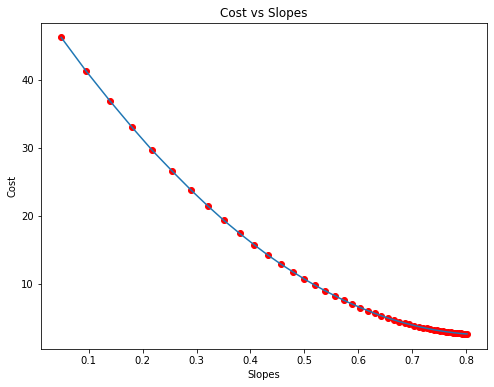

[0.22998234937311363, 0.8017220304137576]


In [164]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Make a prediction with coefficients
def predict(row, coefficients):
    b0 = coefficients[0]
    b1 = coefficients[1]
    for i in range(len(row)-1):
        yhat = b0 + b1 * row[i]
    return yhat

# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgdd(train, l_rate, n_epoch):
    error_list = []
    intercept_list = []
    slope_list = []
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            yhat = predict(row, coef)
            error = yhat - row[-1]
            sum_error += error**2
            coef[0] = coef[0] - l_rate * error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
        error_list.append(round(sum_error,3))
        intercept_list.append(round(coef[0],3))
        slope_list.append(round(coef[1],3))
        print('>epoch=%d, lrate=%.3f, error=%.3f, b0=%.3f, b1=%.3f' % (epoch, l_rate, sum_error, coef[0], coef[1]))
        
        
    plt.figure(figsize=(8,6))
    plt.plot(slope_list, error_list)
    plt.scatter(slope_list, error_list, marker='o', color='red')
    plt.title("Cost vs Slopes")
    plt.ylabel("Cost")
    plt.xlabel("Slopes")
    plt.show()
    
    return coef

# Calculate coefficients
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
l_rate = 0.001
n_epoch = 50
coef = coefficients_sgdd(dataset, l_rate, n_epoch)
print(coef)

### Now Do Practice on Original Dataset(Wine Quality Prediction)

In [29]:
import pandas as pd
df = pd.read_csv("winequality-white.csv",delimiter=';')

In [37]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [30]:
df.to_csv("wine.csv")

In [31]:
from random import seed
from random import randrange
from csv import reader
from math import sqrt

#### Load Data

In [32]:
# load a csv file
def load_csv(filename):
    dataset = list()
    with open(filename,'r') as file:
        next(file)
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

#### Convert From String to Float

In [34]:
# Convert String Column to float
def str_column_to_float(dataset,column):
    for row in dataset:
        row[column] = float(row[column].strip())

#### dataset_minmax

In [61]:
min_max = list()
file = [[1.2,2.9,3.6,4.8],[3.2,5.4,7.3,8.2],[5.3,2.8,7.2,5.4]]
for i in range(len(file[0])):
    col_val = [row[i] for row in file]
    minval = min(col_val)
    maxval = max(col_val)
    min_max.append([minval,maxval])
min_max

[[1.2, 5.3], [2.8, 5.4], [3.6, 7.3], [4.8, 8.2]]

In [70]:
for i in range(len(file[0])):
    col_val = [row[i] for row in file]
    print(col_val)

[1.2, 3.2, 5.3]
[2.9, 5.4, 2.8]
[3.6, 7.3, 7.2]
[4.8, 8.2, 5.4]


In [195]:
# Find the min and max values for each column
def dataset_minmax(dataset):
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min,value_max])
    return minmax

In [196]:
file = [[1.2,2.9,3.6,4.8],[3.2,5.4,7.3,8.2],[5.3,2.8,7.2,5.4]]
dataset_minmax(file)

[[1.2, 5.3], [2.8, 5.4], [3.6, 7.3], [4.8, 8.2]]

In [71]:
min_max

[[1.2, 5.3], [2.8, 5.4], [3.6, 7.3], [4.8, 8.2]]

#### normalize_dataset

In [72]:
file = [[1.2,2.9,3.6,4.8],[3.2,5.4,7.3,8.2],[5.3,2.8,7.2,5.4]]
for row in file:
    for i in range(len(row)):
        row[i] = (row[i] - min_max[i][0]) / (min_max[i][1] - min_max[i][0])
        print(row[i])

0.0
0.038461538461538484
0.0
0.0
0.48780487804878053
1.0
1.0
1.0
1.0
0.0
0.972972972972973
0.1764705882352943


In [73]:
# Rescale dataset columns to range 0-1
def normalize_dataset(dataset,minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

In [160]:
normalize_dataset(file,min_max)

In [161]:
file

[[0.0, 0.038461538461538484, 0.0, 0.0],
 [0.48780487804878053, 1.0, 1.0, 1.0],
 [1.0, 0.0, 0.972972972972973, 0.1764705882352943],
 [0.0, 0.038461538461538484, 0.0, 0.0],
 [0.48780487804878053, 1.0, 1.0, 1.0],
 [1.0, 0.0, 0.972972972972973, 0.1764705882352943],
 [0.48780487804878053, 1.0, 1.0, 1.0],
 [1.0, 0.0, 0.972972972972973, 0.1764705882352943],
 [1.0, 0.0, 0.972972972972973, 0.1764705882352943]]

#### Cross_validation_split

In [131]:
file = [[1.2,2.9,3.6,4.8],[3.2,5.4,7.3,8.2],[5.3,2.8,7.2,5.4],[1.2,2.9,3.6,4.8],[3.2,5.4,7.3,8.2],[5.3,2.8,7.2,5.4],[3.2,5.4,7.3,8.2],[5.3,2.8,7.2,5.4],[5.3,2.8,7.2,5.4]]
len(file)

9

In [129]:
dataset_split = list()
dataset_copy = list(file)
fold_size = int(len(file)/2)
fold_size

4

In [130]:
from random import randrange
for i in range(2):
    fold = list()
    while len(fold) < fold_size:
        index = randrange(len(dataset_copy))
        print(index)
        fold.append(dataset_copy.pop(index))
    dataset_split.append(fold)
dataset_split

6
2
5
4
0
3
2
1


[[[3.2, 5.4, 7.3, 8.2],
  [5.3, 2.8, 7.2, 5.4],
  [5.3, 2.8, 7.2, 5.4],
  [5.3, 2.8, 7.2, 5.4]],
 [[1.2, 2.9, 3.6, 4.8],
  [5.3, 2.8, 7.2, 5.4],
  [3.2, 5.4, 7.3, 8.2],
  [1.2, 2.9, 3.6, 4.8]]]

In [134]:
len(data)

4898

In [133]:
dataset_split = list()
dataset_copy = list(data)
fold_size = int(len(data)/5)
fold_size

979

In [135]:
from random import randrange
for i in range(2):
    fold = list()
    while len(fold) < fold_size:
        index = randrange(len(dataset_copy))
        print(index)
        fold.append(dataset_copy.pop(index))
    dataset_split.append(fold)
dataset_split

148
2642
1107
4583
428
1722
2612
1641
1014
1041
972
1045
4175
2192
4199
4185
280
3898
2276
646
1609
1561
4423
4496
2493
2677
538
2574
3422
4080
1770
1938
4411
2336
3058
4515
1867
2394
602
2507
1969
3932
2738
2597
1771
612
4119
1259
3612
3769
3681
2814
1610
1580
2996
2845
3753
2707
2331
615
1725
4442
761
1973
3434
962
3891
4682
4117
1627
2440
3337
2472
3927
3700
4693
1268
3296
1429
3934
1399
3339
3464
2997
1579
1070
1351
1156
2132
3018
2409
582
191
990
3809
1434
180
358
2022
4303
4193
3170
928
282
2195
4744
4658
1854
3272
1158
2391
4578
4022
2221
2099
4501
2355
4557
2854
484
4159
4031
2246
1699
3307
913
1678
1934
2571
1385
4445
515
1500
3502
1762
1596
2822
2094
4552
2359
3159
1884
171
1641
2825
3469
210
2280
3309
1674
2583
292
409
2396
4283
1522
4491
4688
4668
403
4711
1588
4128
3586
4400
1957
4520
3868
590
4674
218
1402
2909
3724
1767
2948
2524
1704
2302
4056
2062
2120
2710
495
3348
46
3027
128
54
3646
3357
2061
3456
1499
1905
4610
780
2638
2969
4277
4501
1424
3049
735
3383
275
1291
88

[[['148',
   '6.3',
   '0.34',
   '0.33',
   '4.6',
   '0.034',
   '19.0',
   '80.0',
   '0.9917',
   '3.38',
   '0.58',
   '12.0',
   '7'],
  ['2643',
   '8.1',
   '0.33',
   '0.22',
   '5.2',
   '0.047',
   '24.0',
   '151.0',
   '0.99527',
   '3.22',
   '0.47',
   '10.3',
   '5'],
  ['1108',
   '6.1',
   '0.29',
   '0.27',
   '1.7',
   '0.024',
   '13.0',
   '76.0',
   '0.9893',
   '3.21',
   '0.51',
   '12.6',
   '7'],
  ['4586',
   '5.4',
   '0.29',
   '0.38',
   '1.2',
   '0.029',
   '31.0',
   '132.0',
   '0.98895',
   '3.28',
   '0.36',
   '12.4',
   '6'],
  ['429',
   '7.1',
   '0.31',
   '0.47',
   '13.6',
   '0.056',
   '54.0',
   '197.0',
   '0.9978',
   '3.1',
   '0.49',
   '9.3',
   '5'],
  ['1725',
   '6.9',
   '0.17',
   '0.22',
   '4.6',
   '0.064',
   '55.0',
   '152.0',
   '0.9952',
   '3.29',
   '0.37',
   '9.3',
   '6'],
  ['2616',
   '6.5',
   '0.18',
   '0.41',
   '14.2',
   '0.039',
   '47.0',
   '129.0',
   '0.99678',
   '3.28',
   '0.72',
   '10.3',
   '7'],
 

In [136]:
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

#### root mean squared error(RMSE)

In [156]:
# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

#### Evaluate an algorithm using a cross validation split

In [138]:
folds = cross_validation_split(file, 2)
folds

[[[3.2, 5.4, 7.3, 8.2],
  [3.2, 5.4, 7.3, 8.2],
  [1.2, 2.9, 3.6, 4.8],
  [5.3, 2.8, 7.2, 5.4]],
 [[5.3, 2.8, 7.2, 5.4],
  [5.3, 2.8, 7.2, 5.4],
  [5.3, 2.8, 7.2, 5.4],
  [1.2, 2.9, 3.6, 4.8]]]

In [149]:
scores = list()
for fold in folds:
    train_set = list(folds)
    train_set.remove(fold)
    print(train_set)
    train_set = sum(train_set,[])
    print("Train",train_set)
    test_set = list()
    for row in fold:
        row_copy = list(row)
        test_set.append(row_copy)
        print("Test",test_set)
        row_copy[-1] = None
    actual = [row[-1] for row in fold]
    print("Actual",actual)

[[[5.3, 2.8, 7.2, 5.4], [5.3, 2.8, 7.2, 5.4], [5.3, 2.8, 7.2, 5.4], [1.2, 2.9, 3.6, 4.8]]]
Train [[5.3, 2.8, 7.2, 5.4], [5.3, 2.8, 7.2, 5.4], [5.3, 2.8, 7.2, 5.4], [1.2, 2.9, 3.6, 4.8]]
Test [[3.2, 5.4, 7.3, 8.2]]
Test [[3.2, 5.4, 7.3, None], [3.2, 5.4, 7.3, 8.2]]
Test [[3.2, 5.4, 7.3, None], [3.2, 5.4, 7.3, None], [1.2, 2.9, 3.6, 4.8]]
Test [[3.2, 5.4, 7.3, None], [3.2, 5.4, 7.3, None], [1.2, 2.9, 3.6, None], [5.3, 2.8, 7.2, 5.4]]
Actual [8.2, 8.2, 4.8, 5.4]
[[[3.2, 5.4, 7.3, 8.2], [3.2, 5.4, 7.3, 8.2], [1.2, 2.9, 3.6, 4.8], [5.3, 2.8, 7.2, 5.4]]]
Train [[3.2, 5.4, 7.3, 8.2], [3.2, 5.4, 7.3, 8.2], [1.2, 2.9, 3.6, 4.8], [5.3, 2.8, 7.2, 5.4]]
Test [[5.3, 2.8, 7.2, 5.4]]
Test [[5.3, 2.8, 7.2, None], [5.3, 2.8, 7.2, 5.4]]
Test [[5.3, 2.8, 7.2, None], [5.3, 2.8, 7.2, None], [5.3, 2.8, 7.2, 5.4]]
Test [[5.3, 2.8, 7.2, None], [5.3, 2.8, 7.2, None], [5.3, 2.8, 7.2, None], [1.2, 2.9, 3.6, 4.8]]
Actual [5.4, 5.4, 5.4, 4.8]


In [171]:
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset,n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set,[])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set,test_set,*args)
        actual = [row[-1] for row in fold]
        rmse = rmse_metric(actual,predicted)
        scores.append(rmse)
    return scores

In [172]:
# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return yhat

In [173]:
# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        for row in train:
            yhat = predict(row, coef)
            error = yhat - row[-1]
            coef[0] = coef[0] - l_rate * error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
            # print(l_rate, n_epoch, error)
    return coef

In [174]:
# Linear Regression Algorithm With Stochastic Gradient Descent
def linear_regression_sgd(train, test, l_rate, n_epoch):
    predictions = list()
    coef = coefficients_sgd(train, l_rate, n_epoch)
    for row in test:
        yhat = predict(row, coef)
        predictions.append(yhat)
    return(predictions)

In [199]:
# Linear Regression on Wine Quality Dataset
seed(1)
# Load and prepare data
filename = 'wine.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])):
    str_column_to_float(dataset,i)
# normalize
minmax = dataset_minmax(dataset)
normalize_dataset(dataset,minmax)
# evaluate algorithm
n_folds = 5
l_rate = 0.01
n_epoch = 50
scores = evaluate_algorithm(dataset,linear_regression_sgd,n_folds,l_rate,n_epoch)
print("scores=",scores)
print("Mean RMSE:",(sum(scores)/float(len(scores))))

scores= [0.12214645717271096, 0.1298114307433432, 0.12550709448025074, 0.1275828477686345, 0.12329522672744204]
Mean RMSE: 0.1256686113784763


#### Complete Code

In [3]:
# Linear Regression With Stochastic Gradient Descent for Wine Quality
from random import seed
from random import randrange
from csv import reader
from math import sqrt

# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        next(file)
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

# Find the min and max values for each column
def dataset_minmax(dataset):
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax

# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        rmse = rmse_metric(actual, predicted)
        scores.append(rmse)
    return scores

# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return yhat

# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        for row in train:
            yhat = predict(row, coef)
            error = yhat - row[-1]
            coef[0] = coef[0] - l_rate * error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
            # print(l_rate, n_epoch, error)
    return coef

# Linear Regression Algorithm With Stochastic Gradient Descent
def linear_regression_sgd(train, test, l_rate, n_epoch):
    predictions = list()
    coef = coefficients_sgd(train, l_rate, n_epoch)
    for row in test:
        yhat = predict(row, coef)
        predictions.append(yhat)
    return(predictions)

# Linear Regression on wine quality dataset
seed(1)
# load and prepare data
filename = 'wine.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)
# normalize
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)
# evaluate algorithm
n_folds = 5
l_rate = 0.01
n_epoch = 50
scores = evaluate_algorithm(dataset, linear_regression_sgd, n_folds, l_rate, n_epoch)
print('Scores: %s' % scores)
print('Mean RMSE: %.3f' % (sum(scores)/float(len(scores))))

Scores: [0.12248058224111812, 0.1303401750916616, 0.1262037054752847, 0.12897687952810313, 0.12446990678685779]
Mean RMSE: 0.126
